# 

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df = pd.read_csv("E:\\Sales Data.csv")
df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [53]:
df.isnull().sum()

Unnamed: 0          0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64

In [54]:
df.describe()

,Unnamed: 0,Order ID,Quantity Ordered,Price Each,Month,Sales,Hour
count,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,8340.388475,230417.569379,1.124383,184.399735,7.059140,185.490917,14.413305
std,5450.554093,51512.737110,0.442793,332.731330,3.502996,332.919771,5.423416
min,0.000000,141234.000000,1.000000,2.990000,1.000000,2.990000,0.000000
25%,3894.000000,185831.250000,1.000000,11.950000,4.000000,11.950000,11.000000
50%,7786.000000,230367.500000,1.000000,14.950000,7.000000,14.950000,15.000000
75%,11872.000000,275035.750000,1.000000,150.000000,10.000000,150.000000,19.000000
max,25116.000000,319670.000000,9.000000,1700.000000,12.000000,3400.000000,23.000000


In [55]:
df.head(1)

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.0,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.0,New York City,0


## Count of Products 

Text(0.5, 0, 'Counts')

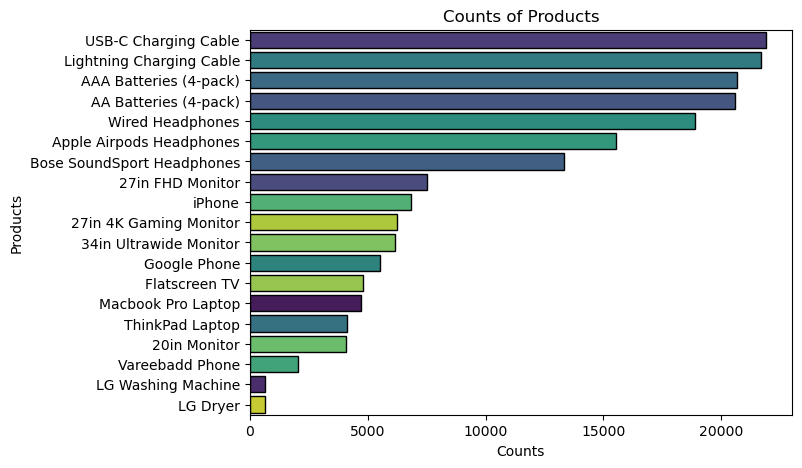

In [56]:
plt.figure(figsize = (7,5))
sns.countplot(y = 'Product' , data = df , order = df['Product'].value_counts().index,hue = 'Product', palette = 'viridis' , dodge = False, edgecolor = "black")
plt.title("Counts of Products")
plt.ylabel("Products")
plt.xlabel("Counts")

## Sales by City

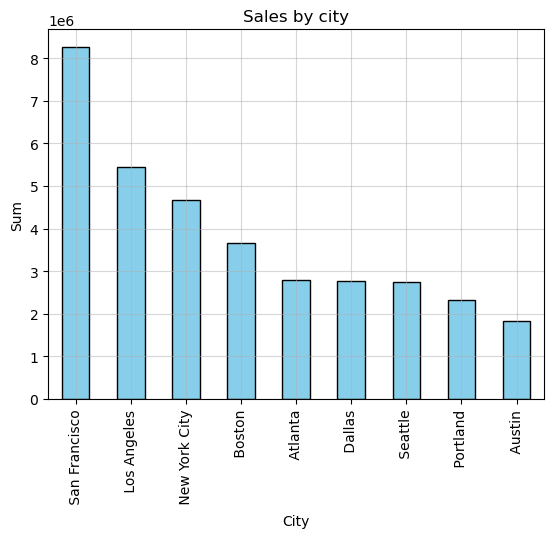

In [57]:
sales_by_city = df.groupby('City')['Sales'].sum().sort_values(ascending = False)
sales_by_city.plot(kind = "bar" , color = "skyblue" , edgecolor = "black")
plt.title("Sales by city")
plt.xlabel("City")
plt.ylabel("Sum")
plt.grid(alpha = 0.5)
plt.show()

## Sales VS Order Quantity

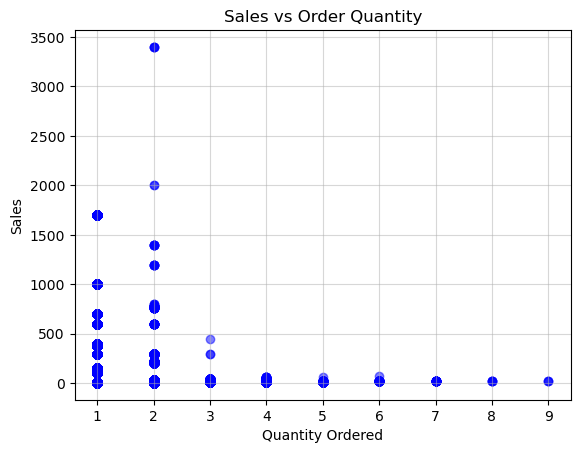

In [58]:
plt.scatter(df['Quantity Ordered'] , df['Sales'] , alpha = 0.5 , color = "blue")
plt.grid(True , alpha = 0.5)
plt.title("Sales vs Order Quantity")
plt.xlabel("Quantity Ordered")
plt.ylabel("Sales")
plt.show()

## Price Distribution

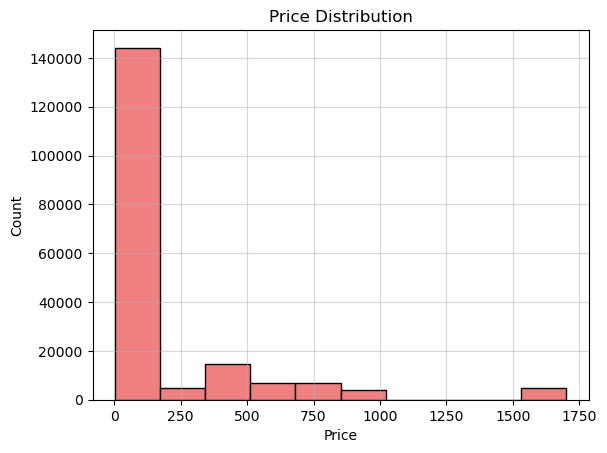

In [59]:
plt.hist(df['Price Each'] , color = "lightcoral" , bins = 10 , edgecolor = "black")
plt.grid(True , alpha = 0.5)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

## Product Total Quantity

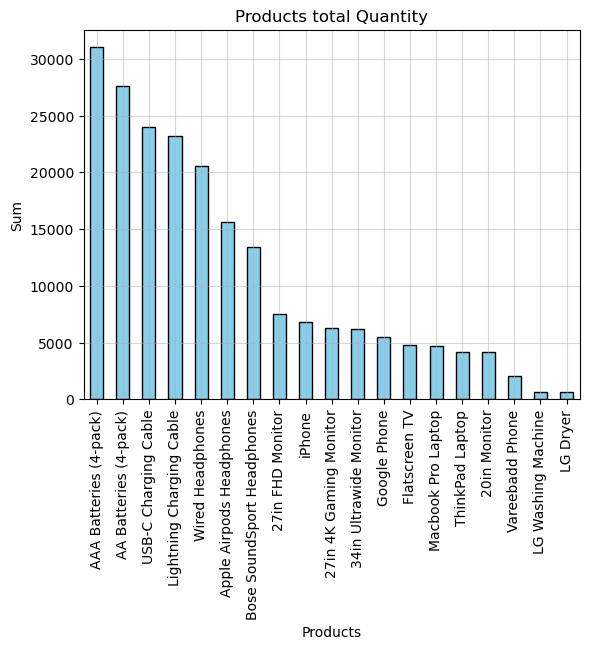

In [60]:
total_order = df.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending = False)
total_order.plot(kind = 'bar' , color = "skyblue" , edgecolor = "black")
plt.title("Products total Quantity")
plt.xlabel("Products")
plt.ylabel("Sum")
plt.grid(alpha = 0.5)
plt.show()

## Product Sales

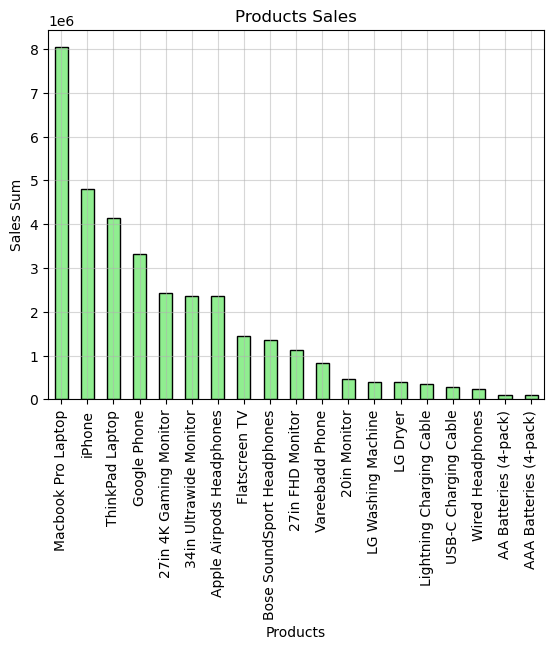

In [61]:
sales_order = df.groupby('Product')['Sales'].sum().sort_values(ascending = False)
sales_order.plot(kind = 'bar' , color = "lightgreen" , edgecolor = "black")
plt.title("Products Sales")
plt.xlabel("Products")
plt.ylabel("Sales Sum")
plt.grid(alpha = 0.5)
plt.show()

## RFM Analysis

In [63]:

df['Order Date'] = pd.to_datetime(df['Order Date'])

most_recent_date = df['Order Date'].max()
df['Recency'] = (most_recent_date - df['Order Date']).dt.days
frequency = df.groupby('Order ID').size().reset_index(name='Frequency') 
df['Sales'] = df['Sales'].astype(float)  # Convert to float if necessary
monetary = df.groupby('Order ID')['Sales'].sum().reset_index(name='Monetary')

df = df.drop(columns=['Frequency', 'Monetary'], errors='ignore')

df = df.merge(frequency, on='Order ID', how='left')
df = df.merge(monetary, on='Order ID', how='left')

df['R_score'] = pd.qcut(df['Recency'], q=4, labels=False, duplicates='drop')
df['F_score'] = pd.qcut(df['Frequency'], q=4, labels=False, duplicates='drop')
df['M_score'] = pd.qcut(df['Monetary'], q=4, labels=False, duplicates='drop')
df['RFM_Segment'] = df['R_score'].astype(str) + df['F_score'].astype(str) + df['M_score'].astype(str)
print(df.head())


   Unnamed: 0  Order ID               Product  Quantity Ordered  Price Each  \
0           0    295665    Macbook Pro Laptop                 1     1700.00   
1           1    295666    LG Washing Machine                 1      600.00   
2           2    295667  USB-C Charging Cable                 1       11.95   
3           3    295668      27in FHD Monitor                 1      149.99   
4           4    295669  USB-C Charging Cable                 1       11.95   

           Order Date                        Purchase Address  Month    Sales  \
0 2019-12-30 00:01:00  136 Church St, New York City, NY 10001     12  1700.00   
1 2019-12-29 07:03:00     562 2nd St, New York City, NY 10001     12   600.00   
2 2019-12-12 18:21:00    277 Main St, New York City, NY 10001     12    11.95   
3 2019-12-22 15:13:00     410 6th St, San Francisco, CA 94016     12   149.99   
4 2019-12-18 12:38:00           43 Hill St, Atlanta, GA 30301     12    11.95   

             City  Hour  Recency  Freq

In [64]:
df = df.drop(columns=['Monetary_x', 'Monetary_y'], errors='ignore')
df = df.drop(columns=['Frequency_x', 'Frequency_y'], errors='ignore')
df = df.drop(columns=['freq_x', 'freq_y'], errors='ignore')
df = df.drop(columns=['freq'], errors='ignore')

In [65]:
df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Segment
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,2,1,1700.00,0,0,3,003
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,2,1,600.00,0,0,3,003
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,19,1,11.95,0,0,0,000
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,9,1,149.99,0,0,2,002
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,13,1,11.95,0,0,0,000


## RFM Customer Segmentation 

In [66]:
def segments_customer(row):
    if row['R_score'] <= 1 and row['F_score'] >= 2 and row['M_score'] >= 2:
        return "Champions"
    elif row['R_score'] <= 2 and row['F_score'] <= 1:
        return "At risk"
    elif row['R_score'] <= 1 and row['F_score'] >= 2:
        return 'Loyal customer'
    else:
        return "Other"

df['RFM Segment'] = df.apply(segments_customer, axis=1)
segment_counts = df['RFM Segment'].value_counts()
print(segment_counts)


RFM Segment
At risk    139967
Other       45983
Name: count, dtype: int64


## Marketing Strats Based on Segmentation

In [67]:
def apply_strats(row):
    if row['RFM Segment'] == ' Champions':
        return "Reward them with loyalty programs or exclusive offers.\
        Engage them with personalized emails and promotions to maintain their loyalty"
    elif row['RFM Segment'] == 'At risk':
        return "Send targeted win-back campaigns or discounts to bring them back."
    elif row['RFM_Segment'] == 'Loyal customer':
        return "Re-engage them with reminders or personalized offers to keep them active."
    else:
        return "Other"

df['Marketing_Strategy'] = df.apply(apply_strats, axis=1)

In [68]:
df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Segment,RFM Segment,Marketing_Strategy
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,2,1,1700.00,0,0,3,003,At risk,Send targeted win-back campaigns or discounts ...
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,2,1,600.00,0,0,3,003,At risk,Send targeted win-back campaigns or discounts ...
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,19,1,11.95,0,0,0,000,At risk,Send targeted win-back campaigns or discounts ...
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,9,1,149.99,0,0,2,002,At risk,Send targeted win-back campaigns or discounts ...
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,13,1,11.95,0,0,0,000,At risk,Send targeted win-back campaigns or discounts ...


<Axes: xlabel='RFM Segment'>

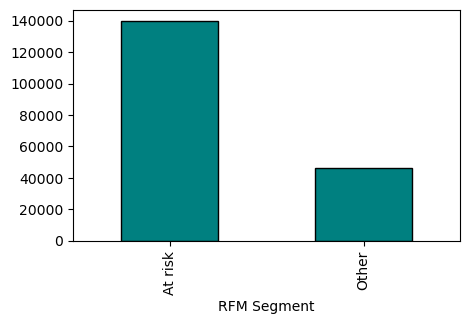

In [69]:
counts_rfmsegments = df['RFM Segment'].value_counts()
plt.figure(figsize = (5,3))
counts_rfmsegments.plot(kind = "bar" , color = "teal" , edgecolor = "black")

In [71]:
file_path = 'C:/Users/Asus/Documents/Sales_performance2.csv'
df1.to_csv(file_path, index=False)